# Introduction to `pandas`

* [**Loading and exploring data files**](#Loading-and-exploring-data-files)
  * [Selecting rows and columns](#Selecting-rows-and-columns)
  * [Sorting](#Sorting)
  * [Duplicates](#Duplicates)
  * [Adding, renaming, and removing columns](#Adding,-renaming,-and-removing-columns)
  * [Replacing values](#Replacing-values)
  * [Changing data types](#Changing-data-types)
* [**Summarising data**](#Summarising-data)
  * [Summary statistics](#Summary-statistics)
  * [Pivot tables](#Pivot-tables)
  * [Split-apply-combine](#Split-apply-combine)
* [**Visualising data**](#Visualising-data)
  * [Histograms and density plots](#Histograms-and-density-plots)
  * [Scatter plots](#Scatter-plots)
  * [Bar plots](#Bar-plots)
  * [Box plots](#Box-plots)

Let's start by importing some libraries:
* `numpy` and `pandas` to load, explore, and summarise the data
* `matplotlib` to visualise the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Make sure plots are shown inside the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

## Loading and exploring data files

For this introduction, we'll use data on student performance from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Student+Performance).

In [2]:
students = pd.read_csv('https://raw.githubusercontent.com/estimand/teaching-datasets/master/student-performance/student_performance.csv')

Note how `pandas` can read data from a local file or directly from a URL. You should also explore other `read_` methods such as `read_excel`.

What's the type of the `students` variable we've just created?

In [3]:
type(students)

pandas.core.frame.DataFrame

`DataFrame`s are at the core of `pandas`. They're organised like Excel spreadsheets, with **rows representing observations** (people, items, etc.), and **columns representing variables** (measurements, attributes, etc.).

The number of rows and columns in a `DataFrame` is known as its `shape`.

In [4]:
students.shape

(649, 31)

We can have a quick look at the data using the functions `head` and `tail`, which return the first or last 5 rows (by default), respectively.

In [5]:
students.head()

,school,sex,age,home_area,family_size,parents_cohabit,education_mother,education_father,occupation_mother,occupation_father,...,internet_access,romantic_relationship,family_relationships_quality,free_time,going_out,alcohol_weekdays,alcohol_weekend,health_status,absences,final_grade
0,Gabriel Pereira,F,18,Urban,> 3,False,Higher education,Higher education,At home,Teacher,...,False,False,4,3,4,1,1,3,4,11
1,Gabriel Pereira,F,17,Urban,> 3,True,Primary education,Primary education,At home,Other,...,True,False,5,3,3,1,1,3,2,11
2,Gabriel Pereira,F,15,Urban,<= 3,True,Primary education,Primary education,At home,Other,...,True,False,4,3,2,2,3,3,6,12
3,Gabriel Pereira,F,15,Urban,> 3,True,Higher education,Lower secondary education,Healthcare,Civil service,...,True,True,3,2,2,1,1,5,0,14
4,Gabriel Pereira,F,16,Urban,> 3,True,Upper secondary education,Upper secondary education,Other,Other,...,False,False,4,3,2,1,2,5,0,13


In [6]:
students.tail()

,school,sex,age,home_area,family_size,parents_cohabit,education_mother,education_father,occupation_mother,occupation_father,...,internet_access,romantic_relationship,family_relationships_quality,free_time,going_out,alcohol_weekdays,alcohol_weekend,health_status,absences,final_grade
644,Mouzinho da Silveira,F,19,Rural,> 3,True,Lower secondary education,Upper secondary education,Civil service,Other,...,True,False,5,4,2,1,2,5,4,10
645,Mouzinho da Silveira,F,18,Urban,<= 3,True,Upper secondary education,Primary education,Teacher,Civil service,...,True,False,4,3,4,1,1,1,4,16
646,Mouzinho da Silveira,F,18,Urban,> 3,True,Primary education,Primary education,Other,Other,...,False,False,1,1,1,1,1,5,6,9
647,Mouzinho da Silveira,M,17,Urban,<= 3,True,Upper secondary education,Primary education,Civil service,Civil service,...,True,False,2,4,5,3,4,2,6,10
648,Mouzinho da Silveira,M,18,Rural,<= 3,True,Upper secondary education,Lower secondary education,Civil service,Other,...,True,False,4,4,1,3,4,5,4,11


We can also specify the number of rows we want as an argument.

In [7]:
students.head(10)

,school,sex,age,home_area,family_size,parents_cohabit,education_mother,education_father,occupation_mother,occupation_father,...,internet_access,romantic_relationship,family_relationships_quality,free_time,going_out,alcohol_weekdays,alcohol_weekend,health_status,absences,final_grade
0,Gabriel Pereira,F,18,Urban,> 3,False,Higher education,Higher education,At home,Teacher,...,False,False,4,3,4,1,1,3,4,11
1,Gabriel Pereira,F,17,Urban,> 3,True,Primary education,Primary education,At home,Other,...,True,False,5,3,3,1,1,3,2,11
2,Gabriel Pereira,F,15,Urban,<= 3,True,Primary education,Primary education,At home,Other,...,True,False,4,3,2,2,3,3,6,12
3,Gabriel Pereira,F,15,Urban,> 3,True,Higher education,Lower secondary education,Healthcare,Civil service,...,True,True,3,2,2,1,1,5,0,14
4,Gabriel Pereira,F,16,Urban,> 3,True,Upper secondary education,Upper secondary education,Other,Other,...,False,False,4,3,2,1,2,5,0,13
5,Gabriel Pereira,M,16,Urban,<= 3,True,Higher education,Upper secondary education,Civil service,Other,...,True,False,5,4,2,1,2,5,6,13
6,Gabriel Pereira,M,16,Urban,<= 3,True,Lower secondary education,Lower secondary education,Other,Other,...,True,False,4,4,4,1,1,3,0,13
7,Gabriel Pereira,F,17,Urban,> 3,False,Higher education,Higher education,Other,Teacher,...,False,False,4,1,4,1,1,1,2,13
8,Gabriel Pereira,M,15,Urban,<= 3,False,Upper secondary education,Lower secondary education,Civil service,Other,...,True,False,4,2,2,1,1,1,0,17
9,Gabriel Pereira,M,15,Urban,> 3,True,Upper secondary education,Higher education,Other,Other,...,True,False,5,5,1,1,1,5,0,13


The full set of columns in a `DataFrame` is stored in the attribute `columns`.

In [8]:
students.columns

Index(['school', 'sex', 'age', 'home_area', 'family_size', 'parents_cohabit',
       'education_mother', 'education_father', 'occupation_mother',
       'occupation_father', 'reason', 'guardian', 'travel_time', 'study_time',
       'failures', 'extra_school_support', 'family_support', 'extra_tutoring',
       'extracurricular_activities', 'nursery', 'higher_education',
       'internet_access', 'romantic_relationship',
       'family_relationships_quality', 'free_time', 'going_out',
       'alcohol_weekdays', 'alcohol_weekend', 'health_status', 'absences',
       'final_grade'],
      dtype='object')

Each column has an associated data type (e.g. `int` or `float`). These are stored in the attribute `dtypes`.

In [9]:
students.dtypes

school                          object
sex                             object
age                              int64
home_area                       object
family_size                     object
parents_cohabit                   bool
education_mother                object
education_father                object
occupation_mother               object
occupation_father               object
reason                          object
guardian                        object
travel_time                     object
study_time                      object
failures                        object
extra_school_support              bool
family_support                    bool
extra_tutoring                    bool
extracurricular_activities        bool
nursery                           bool
higher_education                  bool
internet_access                   bool
romantic_relationship             bool
family_relationships_quality     int64
free_time                        int64
going_out                

Note how `pandas` stores `str`ings as `object`s.

Type-specific methods can be accessed using attributes such as `str` (for `str`ings) and `dt` (for `datetime` objects representing dates and times).

In [10]:
students['school'].str.contains('Pereira')

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
619    False
620    False
621    False
622    False
623    False
624    False
625    False
626    False
627    False
628    False
629    False
630    False
631    False
632    False
633    False
634    False
635    False
636    False
637    False
638    False
639    False
640    False
641    False
642    False
643    False
644    False
645    False
646    False
647    False
648    False
Name: school, Length: 649, dtype: bool

### Selecting rows and columns

#### Boolean filtering

Using `[]` and a `bool`ean condition, we can **select rows** that satisfy certain conditions.

In [11]:
students[students['age'] <= 18].head()

,school,sex,age,home_area,family_size,parents_cohabit,education_mother,education_father,occupation_mother,occupation_father,...,internet_access,romantic_relationship,family_relationships_quality,free_time,going_out,alcohol_weekdays,alcohol_weekend,health_status,absences,final_grade
0,Gabriel Pereira,F,18,Urban,> 3,False,Higher education,Higher education,At home,Teacher,...,False,False,4,3,4,1,1,3,4,11
1,Gabriel Pereira,F,17,Urban,> 3,True,Primary education,Primary education,At home,Other,...,True,False,5,3,3,1,1,3,2,11
2,Gabriel Pereira,F,15,Urban,<= 3,True,Primary education,Primary education,At home,Other,...,True,False,4,3,2,2,3,3,6,12
3,Gabriel Pereira,F,15,Urban,> 3,True,Higher education,Lower secondary education,Healthcare,Civil service,...,True,True,3,2,2,1,1,5,0,14
4,Gabriel Pereira,F,16,Urban,> 3,True,Upper secondary education,Upper secondary education,Other,Other,...,False,False,4,3,2,1,2,5,0,13


Note that the result of this operation is another `DataFrame`, meaning that we can call methods such as `head`.

We can also combine multiple conditions.

In [12]:
students[(students['age'] <= 18) & (students['romantic_relationship'])].head()

,school,sex,age,home_area,family_size,parents_cohabit,education_mother,education_father,occupation_mother,occupation_father,...,internet_access,romantic_relationship,family_relationships_quality,free_time,going_out,alcohol_weekdays,alcohol_weekend,health_status,absences,final_grade
3,Gabriel Pereira,F,15,Urban,> 3,True,Higher education,Lower secondary education,Healthcare,Civil service,...,True,True,3,2,2,1,1,5,0,14
14,Gabriel Pereira,M,15,Urban,> 3,False,Lower secondary education,Lower secondary education,Other,Other,...,True,True,4,5,2,1,1,3,0,15
29,Gabriel Pereira,M,16,Urban,> 3,True,Higher education,Higher education,Teacher,Teacher,...,True,True,4,4,5,5,5,5,4,12
32,Gabriel Pereira,M,15,Rural,> 3,True,Higher education,Upper secondary education,Teacher,At home,...,True,True,4,5,2,1,1,5,0,15
37,Gabriel Pereira,M,16,Rural,> 3,False,Higher education,Higher education,Other,Teacher,...,True,True,2,4,3,1,1,5,4,13


In [13]:
students[(students['age'] <= 16) | (students['age'] >= 21)].head()

,school,sex,age,home_area,family_size,parents_cohabit,education_mother,education_father,occupation_mother,occupation_father,...,internet_access,romantic_relationship,family_relationships_quality,free_time,going_out,alcohol_weekdays,alcohol_weekend,health_status,absences,final_grade
2,Gabriel Pereira,F,15,Urban,<= 3,True,Primary education,Primary education,At home,Other,...,True,False,4,3,2,2,3,3,6,12
3,Gabriel Pereira,F,15,Urban,> 3,True,Higher education,Lower secondary education,Healthcare,Civil service,...,True,True,3,2,2,1,1,5,0,14
4,Gabriel Pereira,F,16,Urban,> 3,True,Upper secondary education,Upper secondary education,Other,Other,...,False,False,4,3,2,1,2,5,0,13
5,Gabriel Pereira,M,16,Urban,<= 3,True,Higher education,Upper secondary education,Civil service,Other,...,True,False,5,4,2,1,2,5,6,13
6,Gabriel Pereira,M,16,Urban,<= 3,True,Lower secondary education,Lower secondary education,Other,Other,...,True,False,4,4,4,1,1,3,0,13


#### Slicing

Using `[]` and a single `str`ing, we can **select specific columns**.

In [14]:
students['school']

0           Gabriel Pereira
1           Gabriel Pereira
2           Gabriel Pereira
3           Gabriel Pereira
4           Gabriel Pereira
5           Gabriel Pereira
6           Gabriel Pereira
7           Gabriel Pereira
8           Gabriel Pereira
9           Gabriel Pereira
10          Gabriel Pereira
11          Gabriel Pereira
12          Gabriel Pereira
13          Gabriel Pereira
14          Gabriel Pereira
15          Gabriel Pereira
16          Gabriel Pereira
17          Gabriel Pereira
18          Gabriel Pereira
19          Gabriel Pereira
20          Gabriel Pereira
21          Gabriel Pereira
22          Gabriel Pereira
23          Gabriel Pereira
24          Gabriel Pereira
25          Gabriel Pereira
26          Gabriel Pereira
27          Gabriel Pereira
28          Gabriel Pereira
29          Gabriel Pereira
               ...         
619    Mouzinho da Silveira
620    Mouzinho da Silveira
621    Mouzinho da Silveira
622    Mouzinho da Silveira
623    Mouzinho da S

Alternatively, we can access columns using the `.` notation.

In [15]:
students.school

0           Gabriel Pereira
1           Gabriel Pereira
2           Gabriel Pereira
3           Gabriel Pereira
4           Gabriel Pereira
5           Gabriel Pereira
6           Gabriel Pereira
7           Gabriel Pereira
8           Gabriel Pereira
9           Gabriel Pereira
10          Gabriel Pereira
11          Gabriel Pereira
12          Gabriel Pereira
13          Gabriel Pereira
14          Gabriel Pereira
15          Gabriel Pereira
16          Gabriel Pereira
17          Gabriel Pereira
18          Gabriel Pereira
19          Gabriel Pereira
20          Gabriel Pereira
21          Gabriel Pereira
22          Gabriel Pereira
23          Gabriel Pereira
24          Gabriel Pereira
25          Gabriel Pereira
26          Gabriel Pereira
27          Gabriel Pereira
28          Gabriel Pereira
29          Gabriel Pereira
               ...         
619    Mouzinho da Silveira
620    Mouzinho da Silveira
621    Mouzinho da Silveira
622    Mouzinho da Silveira
623    Mouzinho da S

Since everything in Python is an object, what's the type of the column we've just selected?

In [16]:
type(students['school'])

pandas.core.series.Series

Using `[]` and a `list` of `str`ings, we can also **select multiple columns** at the same time.

In [17]:
students[['sex', 'age']]

,sex,age
0,F,18
1,F,17
2,F,15
3,F,15
4,F,16
5,M,16
6,M,16
7,F,17
8,M,15
9,M,15


#### `loc`, `iloc`, and `ix`

These three methods can be used to **simultaneously select rows and columns** of a `DataFrame`.

`loc` selects rows or columns by **name**

In [18]:
students.loc[:,'age']  # All rows, column 'age'

0      18
1      17
2      15
3      15
4      16
5      16
6      16
7      17
8      15
9      15
10     15
11     15
12     15
13     15
14     15
15     16
16     16
17     16
18     17
19     16
20     15
21     15
22     16
23     16
24     15
25     16
26     15
27     15
28     16
29     16
       ..
619    18
620    17
621    17
622    18
623    18
624    17
625    18
626    18
627    18
628    17
629    17
630    18
631    18
632    19
633    18
634    18
635    17
636    18
637    18
638    17
639    19
640    18
641    18
642    17
643    18
644    19
645    18
646    18
647    17
648    18
Name: age, Length: 649, dtype: int64

`iloc` selects rows and columns by **position**

In [19]:
students.iloc[0:5,:]  # First five rows, all columns

,school,sex,age,home_area,family_size,parents_cohabit,education_mother,education_father,occupation_mother,occupation_father,...,internet_access,romantic_relationship,family_relationships_quality,free_time,going_out,alcohol_weekdays,alcohol_weekend,health_status,absences,final_grade
0,Gabriel Pereira,F,18,Urban,> 3,False,Higher education,Higher education,At home,Teacher,...,False,False,4,3,4,1,1,3,4,11
1,Gabriel Pereira,F,17,Urban,> 3,True,Primary education,Primary education,At home,Other,...,True,False,5,3,3,1,1,3,2,11
2,Gabriel Pereira,F,15,Urban,<= 3,True,Primary education,Primary education,At home,Other,...,True,False,4,3,2,2,3,3,6,12
3,Gabriel Pereira,F,15,Urban,> 3,True,Higher education,Lower secondary education,Healthcare,Civil service,...,True,True,3,2,2,1,1,5,0,14
4,Gabriel Pereira,F,16,Urban,> 3,True,Upper secondary education,Upper secondary education,Other,Other,...,False,False,4,3,2,1,2,5,0,13


`ix` selects rows or columns by **name** (same as `loc`), but falls back to **position** (like `iloc`) if needed

### Sorting

It may be desirable to sort a `DataFrame` by some column(s), for example to identify unusual observations.

In [20]:
students.sort_values('absences', ascending=False).head()

,school,sex,age,home_area,family_size,parents_cohabit,education_mother,education_father,occupation_mother,occupation_father,...,internet_access,romantic_relationship,family_relationships_quality,free_time,going_out,alcohol_weekdays,alcohol_weekend,health_status,absences,final_grade
197,Gabriel Pereira,F,17,Urban,<= 3,True,Upper secondary education,Upper secondary education,Other,Other,...,True,True,5,3,3,2,3,1,32,14
212,Gabriel Pereira,F,17,Urban,> 3,True,Higher education,Higher education,Civil service,Teacher,...,True,False,4,2,4,2,3,2,30,16
256,Gabriel Pereira,M,18,Urban,> 3,True,Lower secondary education,Lower secondary education,Other,At home,...,True,True,4,4,3,2,2,1,26,8
150,Gabriel Pereira,F,15,Urban,> 3,False,Upper secondary education,Upper secondary education,Civil service,Civil service,...,False,True,1,3,2,2,3,1,24,9
325,Gabriel Pereira,M,17,Urban,<= 3,False,Higher education,Primary education,Civil service,Other,...,True,True,4,5,4,2,4,5,22,10


In [21]:
students.sort_values(['alcohol_weekdays', 'alcohol_weekend'], ascending=False).head()

,school,sex,age,home_area,family_size,parents_cohabit,education_mother,education_father,occupation_mother,occupation_father,...,internet_access,romantic_relationship,family_relationships_quality,free_time,going_out,alcohol_weekdays,alcohol_weekend,health_status,absences,final_grade
29,Gabriel Pereira,M,16,Urban,> 3,True,Higher education,Higher education,Teacher,Teacher,...,True,True,4,4,5,5,5,5,4,12
61,Gabriel Pereira,F,16,Urban,> 3,True,Primary education,Primary education,Civil service,Civil service,...,True,True,5,5,5,5,5,5,0,16
66,Gabriel Pereira,M,15,Urban,> 3,False,Higher education,Higher education,Other,Civil service,...,True,True,1,3,3,5,5,3,0,12
100,Gabriel Pereira,M,16,Urban,> 3,True,Higher education,Higher education,Civil service,Civil service,...,True,False,4,5,5,5,5,4,12,8
237,Gabriel Pereira,M,18,Urban,> 3,True,Lower secondary education,Lower secondary education,Other,Other,...,True,False,3,3,3,5,5,4,9,10


### Duplicates

Duplicate rows can be identified using `duplicated`, which returns `True` if a row (possibly limited to a subset of columns) has been seen previously. We can count the number of duplicate rows by combining `duplicated` with `sum`.

Duplicate rows can be removed using Boolean filtering, or directly using `drop_duplicates`.

In [22]:
students.duplicated().sum()

0

In [23]:
students['school'].duplicated().sum()

647

In [24]:
students.duplicated(['school', 'sex', 'age']).duplicated().sum()

647

### Adding, renaming, and removing columns

The `[]` notation can also be used to create new columns, for example based on existing information.

In [25]:
students['minor'] = students['age'] < 18

In [26]:
students['minor'].value_counts()

True     468
False    181
Name: minor, dtype: int64

Columns can be renamed using `rename`, which takes a `dict`ionary mapping old names to new names.

In [27]:
students.rename(columns={
    'minor': 'is_minor'
}, inplace=True)

Rows and columns can be removed using `drop`, with `axis` set to 0 for rows, and to 1 for columns.

In [28]:
students.drop('is_minor', axis=1, inplace=True)

### Replacing values

Values in a `Series` can be replaced using `replace`, which takes a `dict`ionary mapping old values to new values.

In [29]:
students.failures.value_counts()

0       549
1        70
2        16
>= 3     14
Name: failures, dtype: int64

In [30]:
students['failures'].replace({
    '>= 3': '3'
}, inplace=True)

In [31]:
students.failures.value_counts()

0    549
1     70
2     16
3     14
Name: failures, dtype: int64

### Changing data types

Data types can be converted using `astype`.

In [32]:
students['failures'].dtype

dtype('O')

In [33]:
students['failures'] = students['failures'].astype('int')

In [34]:
students['failures'].dtype

dtype('int64')

## Summarising data

### Summary statistics

A number of summary statistics can be computed using methods such as `mean` and `median`, which can be called on `Series` or `DataFrame`s.

In [35]:
students['age'].mean()

16.7442218798151

In [36]:
students['age'].median()

17.0

In addition, `describe` provides an easy way to compute a number of summary statistics in one go.

In [37]:
students['age'].describe()

count    649.000000
mean      16.744222
std        1.218138
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

#### Tabulation and cross-tabulation

When dealing with categorical variables, it's often useful to:
* Count the number of unique values (using `nunique`)
* Retrieve the set of unique values (using `unique`)
* Tabulate, i.e. count the number of occurrences of each value (using `value_counts`)

In [38]:
students['sex'].nunique()

2

In [39]:
students['sex'].unique()

array(['F', 'M'], dtype=object)

In [40]:
students['sex'].value_counts()

F    383
M    266
Name: sex, dtype: int64

By default, the output of `value_counts` is in decreasing order. If desired, we may sort by value using `sort_index`.

In [41]:
students['alcohol_weekdays'].value_counts().sort_index()

1    451
2    121
3     43
4     17
5     17
Name: alcohol_weekdays, dtype: int64

Given two `Series`, we can also cross-tabulate.

In [42]:
pd.crosstab(students['alcohol_weekdays'], students['alcohol_weekend'])

alcohol_weekend,1,2,3,4,5
alcohol_weekdays,,,,,
1,241,113,64,28,5
2,3,34,43,34,7
3,1,1,9,20,12
4,1,1,4,5,6
5,1,1,0,0,15


### Pivot tables

Using the method `pivot_table`, we can generate tables of summary statistics (`mean`s by default).

In [43]:
students.pivot_table(values='age', index=['school', 'sex'])

age
school               sex           
Gabriel Pereira      F    16.738397
                     M    16.575269
Mouzinho da Silveira F    16.869863
                     M    16.925000

In the call to `pivot_table`, variables used to define rows are specified in `index`, and columns in `columns`. A different statistic can be computed by specifying `aggfunc`.

In [44]:
students.pivot_table(values='age', index='school', columns='sex', aggfunc='median')

sex,F,M
school,,
Gabriel Pereira,17,16
Mouzinho da Silveira,17,17


In [45]:
students.pivot_table(values='alcohol_weekdays', index=['school', 'home_area'], columns='sex')

sex                                    F         M
school               home_area                    
Gabriel Pereira      Rural      1.292683  1.810811
                     Urban      1.290816  1.671141
Mouzinho da Silveira Rural      1.303797  2.150000
                     Urban      1.238806  2.025000

### Split-apply-combine

[Split-apply-combine](http://pandas.pydata.org/pandas-docs/stable/groupby.html) involves:
* Splitting the data into groups based on some criteria
* Applying a function (e.g. `mean`) to each group independently
* Combining the results back into a `DataFrame`

![Split-apply-combine](http://i.imgur.com/yjNkiwL.png)

In [46]:
students.groupby('school')['age'].mean()

school
Gabriel Pereira         16.666667
Mouzinho da Silveira    16.889381
Name: age, dtype: float64

In [47]:
students.groupby('school')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
school,,,,,,,,
Gabriel Pereira,423.0,16.666667,1.244895,15.0,16.0,17.0,18.0,22.0
Mouzinho da Silveira,226.0,16.889381,1.155152,15.0,16.0,17.0,18.0,20.0


In [48]:
students.groupby('school')['age'].agg(['median', 'min', 'max'])  # Customisable

,median,min,max
school,,,
Gabriel Pereira,17,15,22
Mouzinho da Silveira,17,15,20


## Visualising data

### Histograms and density plots

Histograms and density plots show the distribution of a numerical variable.

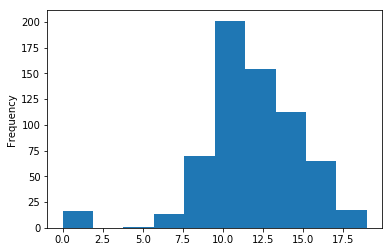

In [49]:
students['final_grade'].plot.hist()  # 10 bins by default

We can also specify the number of bins as an argument.

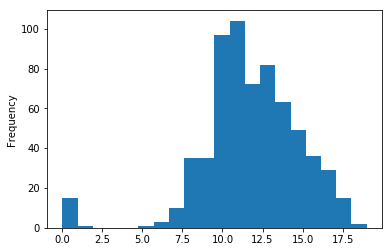

In [50]:
students['final_grade'].plot.hist(20)

Let's now compare these with the corresponding density plot ('smooth' version of a histogram).

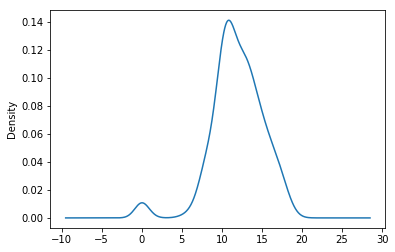

In [51]:
students['final_grade'].plot.density()

#### Grouped histograms

We can also create histograms grouped by some variable, e.g. `school`.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f51561ec3c8>,
      dtype=object)

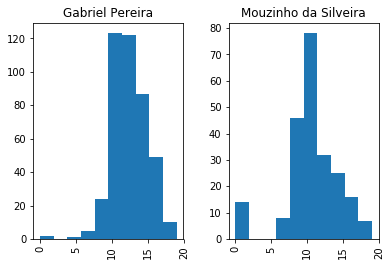

In [52]:
students.hist(column='final_grade', by='school')

In addition, we can ensure that the x-axis and y-axis are shared.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f515614bef0>,
      dtype=object)

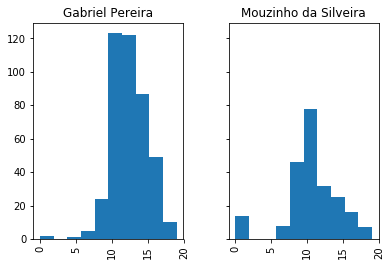

In [53]:
students.hist(column='final_grade', by='school', sharex=True, sharey=True)

### Scatter plots

Scatter plots show the relationship between two (or pairs of) numerical variables.

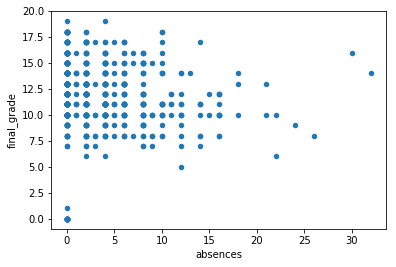

In [54]:
students.plot.scatter(x='absences', y='final_grade')

When points overlap, it can be useful to add some transparency.

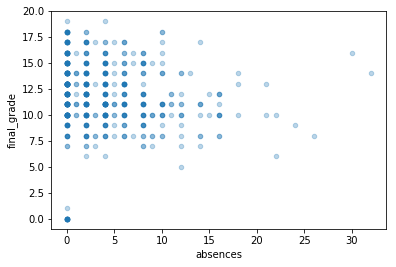

In [55]:
students.plot.scatter(x='absences', y='final_grade', alpha=0.3)

Using `scatter_matrix`, we can generate all pairwise scatter plots for a (small) set of numerical variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5155f67320>,
      dtype=object)

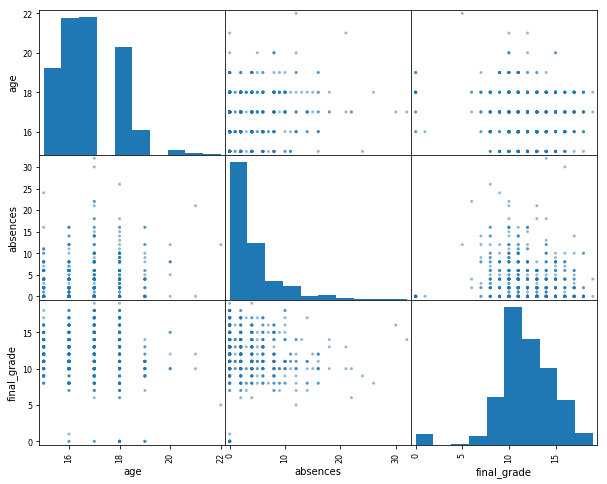

In [56]:
pd.plotting.scatter_matrix(students[['age', 'absences', 'final_grade']], figsize=(10, 8))

### Bar plots

Bar plots show a numerical comparison across categories.

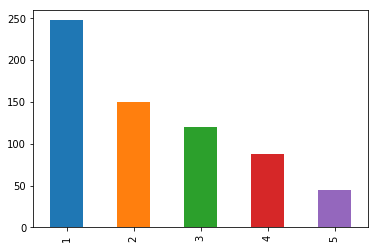

In [57]:
students['alcohol_weekend'].value_counts().sort_index().plot.bar()

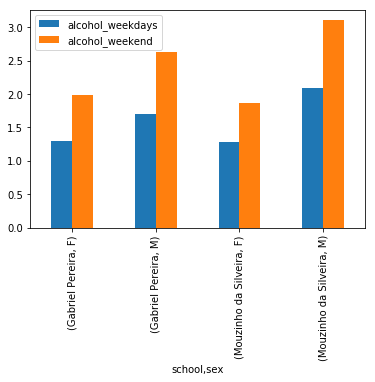

In [58]:
students.groupby(['school', 'sex'])[['alcohol_weekdays', 'alcohol_weekend']].mean().plot.bar()

### Box plots

Box plots show quartiles (and outliers) for numerical variables (possibly across categories).

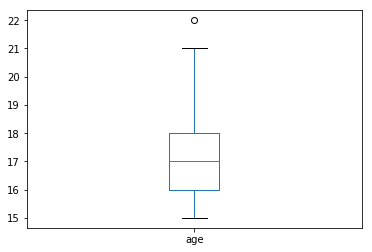

In [59]:
students['age'].plot.box()

We can also include multiple variables and group by some variable, e.g. `sex`.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5155b06080>,
      dtype=object)

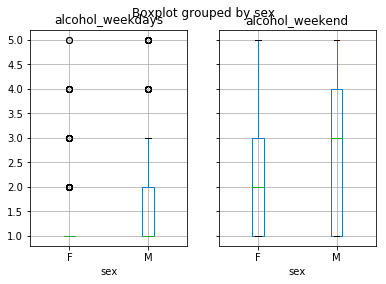

In [60]:
students.boxplot(column=['alcohol_weekdays', 'alcohol_weekend'], by='sex')